# CÁC VẤN ĐỀ NÂNG CAO TRONG PYTHON

## Xử lý tập tin và thư mục

### Thao tác cơ bản trên thư mục

In [3]:
import os
import tempfile

In [4]:
# Lấy thư mục hiện tại đang làm việc
cwd = os.getcwd()
print(cwd)

# Thay đổi thư mục hiện tại đang làm việc
os.chdir(cwd)

c:\Users\MINH HUNG\Downloads


In [5]:
# Lấy thư mục tạm của hệ thống
tmpdir = tempfile.gettempdir()
print(tmpdir)

# Nối các đường dẫn thư mục
mytmpdir = os.path.join(tmpdir, "foobar")
print(mytmpdir)

C:\Users\MINHHU~1\AppData\Local\Temp
C:\Users\MINHHU~1\AppData\Local\Temp\foobar


In [6]:
# Tạo một đường dẫn thư mục {tmpdir}/foobar/plop/toto (sẽ tạo luôn thư mục trung gian nếu chưa có)
os.makedirs(os.path.join(tmpdir, "foobar", "plop", "toto"), exist_ok=True)

# liệt kê nội dung thư mục
print(mytmpdir)
os.listdir(mytmpdir)

C:\Users\MINHHU~1\AppData\Local\Temp\foobar


['plop']

### Nhập/xuất tập tin

In [7]:
# Tạo đường dẫn tới tập tin {mytmpdir}/myfile.txt
filename = os.path.join(mytmpdir, "myfile.txt")
print(filename)

# Ghi nội dung tập tin theo từng dòng
lines = ["Dans python tout est bon", "Enfin, presque"]
fd = open(filename, "w") # Mở tập tin
fd.write(lines[0] + "\n") # Ghi nội dung
fd.write(lines[1]+ "\n")
fd.close() # Đóng tập tin

# Đọc nội dung tập tin
f = open(filename, "r") # Mở tập tin để đọc
f.readline() # Đọc dòng đầu (bao gồm dấu xuống dòng)
f.readline() # Đọc dòng kế
f.close()

# Đọc tất cả dòng trong tập tin
f = open(filename, 'r')
f.readlines() # Đọc tất cả dòng, trả về một list chứa tất cả các dòng
f.close()

# Sử dụng đối tượng context để tự động đóng tập tin
with open(filename, 'r') as f:
    lines = [line for line in f]

C:\Users\MINHHU~1\AppData\Local\Temp\foobar\myfile.txt


### Duyệt tập tin, thư mục

In [8]:
# Duyệt nội dung một thư mục (đệ quy)

folder = os.path.join(tmpdir, "foobar")

for dirpath, dirnames, filenames in os.walk(folder):
    print(f"+ Thư mục đang duyệt: {dirpath}")
    print(f"  - Các thư mục con: {dirnames}")
    print(f"  - Các tập tin bên trong: {filenames}")

+ Thư mục đang duyệt: C:\Users\MINHHU~1\AppData\Local\Temp\foobar
  - Các thư mục con: ['plop']
  - Các tập tin bên trong: ['myfile.txt']
+ Thư mục đang duyệt: C:\Users\MINHHU~1\AppData\Local\Temp\foobar\plop
  - Các thư mục con: ['toto']
  - Các tập tin bên trong: []
+ Thư mục đang duyệt: C:\Users\MINHHU~1\AppData\Local\Temp\foobar\plop\toto
  - Các thư mục con: []
  - Các tập tin bên trong: []


### Tìm kiếm tập tin theo mẫu

In [9]:
import tempfile
import glob

tmpdir = tempfile.gettempdir()

# Tìm tất cả tập tin có dạng đường dẫn {tmpdir}/*/*.txt
filenames = glob.glob(os.path.join(tmpdir, "*", "*.txt"))
print(filenames)

['C:\\Users\\MINHHU~1\\AppData\\Local\\Temp\\foobar\\myfile.txt']


In [10]:
# lấy thông tin tập tin
filepath = filenames[0]
print(f"File Path: {filepath}")

dirname, filename = os.path.split(filepath)
print(f"Directory: {dirname} - Filename: {filename}")

basename, extfile = os.path.splitext(filename)
print(f"Basename: {basename} - Extension: {extfile}")

File Path: C:\Users\MINHHU~1\AppData\Local\Temp\foobar\myfile.txt
Directory: C:\Users\MINHHU~1\AppData\Local\Temp\foobar - Filename: myfile.txt
Basename: myfile - Extension: .txt


### Sao chép tập tin, thư mục

In [11]:
import shutil

src = os.path.join(tmpdir, "foobar", "myfile.txt")
dst = os.path.join(tmpdir, "foobar", "plop", "myfile.txt")
print("copy %s to %s" % (src, dst))

# Sao chép tập tin
shutil.copy(src, dst)

# Kiểm tra sự tồn tại
print("File %s exists ?" % dst, os.path.exists(dst))

src = os.path.join(tmpdir, "foobar", "plop")
dst = os.path.join(tmpdir, "plop2")

print("copy tree %s under %s" % (src, dst))

# Sao chép, xóa, di chuyển thư mục
try:
    shutil.copytree(src, dst)
    shutil.rmtree(dst)
    shutil.move(src, dst)
except (FileExistsError, FileNotFoundError) as e:
    pass

copy C:\Users\MINHHU~1\AppData\Local\Temp\foobar\myfile.txt to C:\Users\MINHHU~1\AppData\Local\Temp\foobar\plop\myfile.txt
File C:\Users\MINHHU~1\AppData\Local\Temp\foobar\plop\myfile.txt exists ? True
copy tree C:\Users\MINHHU~1\AppData\Local\Temp\foobar\plop under C:\Users\MINHHU~1\AppData\Local\Temp\plop2


## Lập trình hướng đối tượng

**Các nguyên lý hướng đối tượng**:
+ **Encapsulate** (Tính bao gộp): đóng gói dữ liệu (attributes) và mã nguồn (methods) vào thành các đối tượng.
+ **Class**: biểu mẫu để tạo các đối tượng riêng biệt có cùng dạng dữ liệu và mã nguồn.
+ **Object**: một thực thể xác định của một Class.
+ **Inheritance** (Tính kế thừa): cho phép các lớp được kế thừa các trạng thái và hành vi chung của lớp cha (tái sử dụng mã nguồn)
+ **Polymorphism** (Tính đa hình): gọi phương thức tương ứng với thực thể đang sở hữu nó dù nó kế thừa phương thức đó từ lớp cha (giúp chương trình có tính khả mở - nghĩa là người lập trình có thể kế thừa và khai báo lại phương thức từ lớp cha với hành vi xử lý mới).

In [12]:
import math

# Xây dựng đối tượng cha
class Shape2D:
    def area(self): # Có 1 hàm dùng chung area
        raise NotImplementedError()

# Inheritance + Encapsulation (Kế thừa và tính bao gộp)
class Square(Shape2D): # Kế thừa từ Shape2D
    def __init__(self, width): # Khai báo hàm tạo
        self.width = width
    
    def area(self): # Tính đa hình, override lại area của Lớp Shape2D
        return self.width ** 2

class Disk(Shape2D):
    def __init__(self, radius): # Hàm tạo
        self.radius = radius
    
    def area(self): # Tính đa hình, override lại area của Lớp Shape2D
        return math.pi * self.radius ** 2

shapes = [Square(2), Disk(3)]

# Polymorphism (Tính đa hình
print([s.area() for s in shapes]) # sẽ gọi phương thức area của lớp tương ứng (Square, Disk)
s = Shape2D()
try:
    s.area() 
except NotImplementedError as e:
    print("NotImplementedError", e)

[4, 28.274333882308138]
NotImplementedError 


# THƯ VIỆN TÍNH TOÁN KHOA HỌC

## Numpy: thư viện xử lý mảng và ma trận

https://numpy.org/doc/stable/reference/index.html

In [13]:
from __future__ import print_function
import numpy as np

### Tạo mảng

In [14]:
# Tạo mảng
data1 = [1, 2, 3, 4, 5]            # cho danh sách
arr1 = np.array(data1)             # tạo mảng từ danh sách
print(f"arr1: {type(arr1)}\n{arr1}\n")

data2 = [range(1, 5), range(5, 9)] # cho danh sách các mảng
arr2 = np.array(data2)             # tạo mảng 2 chiều
print(f"arr2: {type(arr2)}\n{arr2}\n")

lst = arr2.tolist()                      # chuyển đổi trở lại danh sách
print(f'List: {type(lst)} {lst}')

arr1: <class 'numpy.ndarray'>
[1 2 3 4 5]

arr2: <class 'numpy.ndarray'>
[[1 2 3 4]
 [5 6 7 8]]

List: <class 'list'> [[1, 2, 3, 4], [5, 6, 7, 8]]


### Tạo mảng đặc biệt

In [15]:
np.zeros(10)           # Mảng 1 chiều có 10 phần tử  với giá trị 0
np.zeros((3, 6))       # Mảng 2 chiều (3 dòng, 6 cột) với giá trị 0
np.ones(10)            # Mảng 10 phần tử giá trị 1
np.linspace(0, 1, 5)   # 0 to 1 (inclusive) with 5 points
np.logspace(0, 3, 4)   # 10^0 to 10^3 (inclusive) with 4 points

array([   1.,   10.,  100., 1000.])

In [16]:
int_array = np.arange(5)  # Tạo mảng chứa giá trị từ [0, 1, 2, ..., 4]
float_array = int_array.astype(float) # Ép sang mảng có kiểu số thực
print(float_array)

[0. 1. 2. 3. 4.]


### Kiểm tra tính chất mảng

In [17]:
arr1.dtype          # kiểm tra kiểu: float64
arr2.ndim           # kiểm tra số chiều: 2
arr2.shape          # kiểm tra hình dáng mảng: 2 chiều (2,4) với 2 dòng 4 cột
arr2.size           # tổng số phần tử trong mảng: 8
len(arr2)           # độ dài của chiều đầu tiên: 2

2

### Biến đổi hình dạng mảng (Reshape)

In [18]:
arr = np.arange(10, dtype=float) # Tạo mảng số thực từ [0, 1, ..., 9] shape (10,) 
print(arr)
arr = arr.reshape((2, 5)) # chuyển thành shape (2,5)
print(arr.shape)
print(arr)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
(2, 5)
[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]


In [19]:
# Thêm một chiều mới
a = np.array([0, 1])
print("Before: ", a, " - Shape=", a.shape)
a_col = a[:, np.newaxis] 
# hoặc 
a_col = a[:, None]
print("After: Shape=", a_col.shape, "\n", a_col)

# Đảo mảng (Transpose)
print("Transpose: Shape=", a_col.T.shape, " - ", a_col.T)

Before:  [0 1]  - Shape= (2,)
After: Shape= (2, 1) 
 [[0]
 [1]]
Transpose: Shape= (1, 2)  -  [[0 1]]


In [20]:
# Flatten trả về phiên bản sao chép của mảng ban đầu với 1 chiều
arr_flt = arr.flatten()
arr_flt[0] = 33
print(arr_flt)
print(arr)

[33.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]


In [21]:
# Trả về một view của mảng ban đầu với 1 chiều
arr_flt = arr.ravel()
arr_flt[0] = 33
print(arr_flt)
print(arr)

[33.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[[33.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


### Truy xuất trên mảng

![](img1.png)

In [22]:
# Khai báo mảng [0, 1, ..., 2 * 3 * 4)
x = np.arange(2 * 3 * 4)
print(f"x: {x.shape} - {x}")

x = x.reshape(2, 3, 4)
print(f'x: {x.shape}\n{x}')

x: (24,) - [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
x: (2, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [23]:
# Chọn các phần tử ở vị trí 0 trên axis 0 (mặt đầu tiên)
print(x[0, :, :])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [24]:
# Chọn các phần tử ở vị trí 0 trên axis 1 (dòng đầu tiên)
print(x[:, 0, :])

[[ 0  1  2  3]
 [12 13 14 15]]


In [25]:
# Chọn các phần tử ở vị trí 0 trên axis 2 (cột đầu tiên)
print(x[:, :, 0])

[[ 0  4  8]
 [12 16 20]]


### Ghép 2 mảng

In [26]:
a = np.array([0, 1])
b = np.array([2, 3])
print(f'a: {a}')
print(f'b: {b}')

a: [0 1]
b: [2 3]


In [28]:
# Horizontal stacking
np.hstack([a, b])

array([0, 1, 2, 3])

In [27]:
# Vertical stacking
np.vstack([a, b])

array([[0, 1],
       [2, 3]])

### Chọn lựa trên mảng

In [29]:
# Một phần tử
arr = np.arange(10, dtype=float).reshape((2, 5))
print(arr)
print(arr[0])    # các phẩn tử ở dòng 0 (trảslices like a list)
print(arr[0, 3]) # dòng 0, cột 3 --> 3
print(arr[0][3])  # hay cách khác

[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
[0. 1. 2. 3. 4.]
3.0
3.0


In [30]:
# Slicing
# Cú pháp: start:stop:step with start (default 0) stop (default last) step (default 1)
arr[0, :]          # dòng 0 --> 1d array ([1, 2, 3, 4])
arr[:, 0]          # cột  0 --> 1d array ([1, 5])
arr[:, :2]         # các cột trước vị trí 2 (2 cột đầu tiên)
arr[:, 2:]         # các cột từ vị trí 2 trở đi
arr2 = arr[:, 1:4] # các cột từ 1 đến dưới 4 (1, 2, 3)
print(arr2)

[[1. 2. 3.]
 [6. 7. 8.]]


In [31]:
# Hiệu chỉnh một phần tử (Slicing trả về 1 view nên có thê hiệu chỉnh)
arr2[0, 0] = 33
print(arr2)
print(arr)

[[33.  2.  3.]
 [ 6.  7.  8.]]
[[ 0. 33.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [32]:
# Đảo chiều của dòng 0
print(arr[0, ::-1])

[ 4.  3.  2. 33.  0.]


In [33]:
# Fancy indexing: Integer or boolean array indexing
# Trả về một sao chép dựa trên mặt nạ int hay bool
arr2 = arr[:, [1, 2, 3]] # trả về một sao chép (các phần tử ở cột 1, 2, 3)
print(arr2)
arr2[0, 0] = 44
print(arr2)
print(arr)

[[33.  2.  3.]
 [ 6.  7.  8.]]
[[44.  2.  3.]
 [ 6.  7.  8.]]
[[ 0. 33.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [34]:
# Boolean arrays indexing
b_filter = arr > 5
print(f"Bool Index: \n{b_filter}")

arr2 = arr[b_filter]  # return a copy (các phần tử có giá trị lớn hơn 5
print(f"arr2: \n{arr2}")

arr2[0] = 44
print(f"arr2: \n{arr2}")
print(f"arr: \n{arr}")

Bool Index: 
[[False  True False False False]
 [False  True  True  True  True]]
arr2: 
[33.  6.  7.  8.  9.]
arr2: 
[44.  6.  7.  8.  9.]
arr: 
[[ 0. 33.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [35]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob'])

b_filter = names == 'Bob'  # Tạo Bool Index
print(f"Bool Index: \n{b_filter}")

arr1 = names[names != 'Bob']  # lấy phần tử dựa trên Bool Index
print(f"arr1: \n{arr1}")

b_filter1 = (names == 'Bob') | (names == 'Will') # dùng toán tử or
print(f"Bool Index 1: \n{b_filter1}")

names[names != 'Bob'] = 'Joe' # Thay đổi nội dung dựa vào Bool Index
print(f"names: \n{names}")

arr2 = np.unique(names)
print(f"unique: \n{arr2}")

Bool Index: 
[ True False False  True]
arr1: 
['Joe' 'Will']
Bool Index 1: 
[ True False  True  True]
names: 
['Bob' 'Joe' 'Joe' 'Bob']
unique: 
['Bob' 'Joe']


### Các phép toán trên mảng

In [36]:
nums = np.arange(5)
nums * 10                       # phép nhân từng phần tử 
nums = np.sqrt(nums)            # lấy bình phương từng phần tử
np.ceil(nums)                   # also floor, rint (round to nearest int)
np.isnan(nums)                  # checks for NaN
nums + np.arange(5)             # add element-wise
np.maximum(nums, np.array([1, -2, 3, -4, 5])) # compare element-wise

# Compute Euclidean distance between 2 vectors
vec1 = np.random.randn(10)
vec2 = np.random.randn(10)
dist = np.sqrt(np.sum((vec1 - vec2) ** 2))

# math and stats
rnd = np.random.randn(4, 2) # random normals in 4x2 array
rnd.mean()
rnd.std()
rnd.argmin() # index of minimum element
rnd.sum()
rnd.sum(axis=0) # sum of columns
rnd.sum(axis=1) # sum of rows

# methods for boolean arrays
(rnd > 0).sum() # counts number of positive values
(rnd > 0).any() # checks if any value is True
(rnd > 0).all() # checks if all values are True

# random numbers
np.random.seed(12234) # Set the seed
np.random.rand(2, 3) # 2 x 3 matrix in [0, 1]
np.random.randn(10) # random normals (mean 0, sd 1)
np.random.randint(0, 2, 10) # 10 randomly picked 0 or 1

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

### Broadcasting (Kéo dài ngầm định)

Chuyển đổi ngầm định để cho phép các phép toán trên các mảng có kích thước khác nhau. 
- Mảng nhỏ hơn bị kéo dài hoặc "Broadcasting" trên mảng lớn hơn để chúng có hình dạng tương thích. 
- Toán tử thao tác nhanh trên vectơ sử dụng C (nền bên dưới Python) thay vì Python. 
- Không cần sao chép.

```
A (2d array): 5 x 4
B (1d array): 1
Result (2d array): 5 x 4

A (2d array): 5 x 4
B (1d array): 4
Result (2d array): 5 x 4

A (3d array): 15 x 3 x 5
B (3d array): 15 x 1 x 5
Result (3d array): 15 x 3 x 5

A (3d array): 15 x 3 x 5
B (2d array): 3 x 5
Result (3d array): 15 x 3 x 5

A (3d array): 15 x 3 x 5
B (2d array): 3 x 1
Result (3d array): 15 x 3 x 5
```

![](img2.png)

In [37]:
a = np.array([[ 0, 0, 0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([0, 1, 2])
print(a + b)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [38]:
# Trừ cho giá trị trung bình
a - a.mean(axis=0)

array([[-15., -15., -15.],
       [ -5.,  -5.,  -5.],
       [  5.,   5.,   5.],
       [ 15.,  15.,  15.]])

In [39]:
# Chuẩn hóa bằng trừ mean và chia std
(a - a.mean(axis=0)) / a.std(axis=0)

array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

## Matplotlib: thư viện vẽ đồ thị

https://matplotlib.org/

### Vẽ đường thẳng

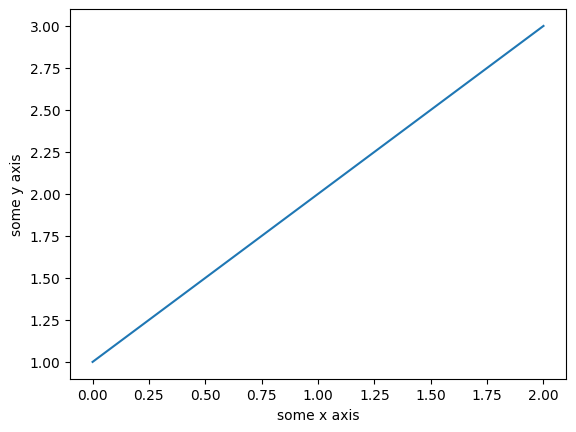

In [1]:
# basic line plot
import matplotlib.pyplot as plt
import numpy

# chuẩn bị dữ liệu
myarray = numpy.array([1, 2, 3])

# vẽ đường thẳng
plt.plot(myarray) 

# tinh chỉnh đồ thị
plt.xlabel('some x axis')
plt.ylabel('some y axis')

# lưu đồ thị
plt.savefig("plot2d.png")

# hiển thị đồ thị
plt.show()

### Vẽ điểm (Scatter Plot)

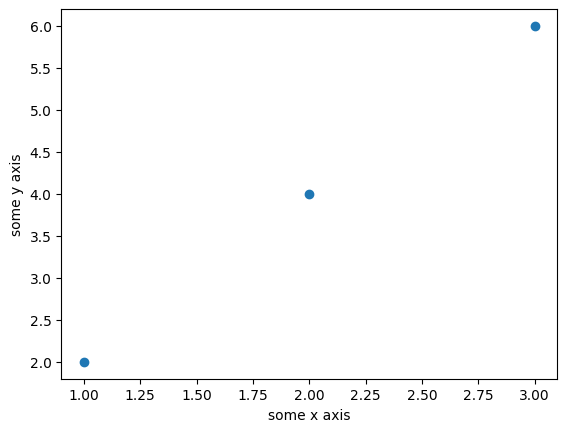

In [2]:
# basic scatter plot
import matplotlib.pyplot as plt
import numpy

# chuẩn bị dữ liệu
x = numpy.array([1, 2, 3])
y = numpy.array([2, 4, 6])

# vẽ đồ thị
plt.scatter(x,y)

# tinh chỉnh đồ thị
plt.xlabel('some x axis')
plt.ylabel('some y axis')

# lưu đồ thị
plt.savefig("scater2d.png")

# hiển thị đồ thị
plt.show()

# KẾT THÚC